In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load the Dataset and Splitting



In [70]:

df = pd.read_csv("tips (data for regression problem).csv")

print(df.info())
print(df.describe())

# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split features and target variable
X = df.drop('tip', axis=1)
y = df['tip']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


Scaling Data

In [71]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


Linear Regression

In [72]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)


Ridge and Lasso Regression

In [73]:
ridge = Ridge(alpha=1.0)
lasso = Lasso(0.01)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)


Decision Tree

In [74]:
dt_regressor = DecisionTreeRegressor(random_state=42)

dt_regressor.fit(X_train, y_train)

y_pred_tree = dt_regressor.predict(X_test)


RandomForest

In [75]:
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)


SVM

In [76]:


svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)

y_pred_svr = svr_reg.predict(X_test)
# y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale



KNN

In [77]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


Accuracy Metrics

In [78]:
models = {
    "Linear Regression": y_pred_lr,
    "Ridge": y_pred_ridge,
    "Lasso": y_pred_lasso,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_forest,
    "Support Vector Regression": y_pred_svr,
    "K-Nearest Neighbors": y_pred_knn,
}

for name, y_pred in models.items():
    print(f"Model: {name}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R-squared: {r2_score(y_test, y_pred):.2f}")
    print("-" * 30)


Model: Linear Regression
Mean Absolute Error: 0.67
Mean Squared Error: 0.70
Root Mean Squared Error: 0.84
R-squared: 0.44
------------------------------
Model: Ridge
Mean Absolute Error: 0.67
Mean Squared Error: 0.70
Root Mean Squared Error: 0.84
R-squared: 0.44
------------------------------
Model: Lasso
Mean Absolute Error: 0.66
Mean Squared Error: 0.69
Root Mean Squared Error: 0.83
R-squared: 0.45
------------------------------
Model: Decision Tree
Mean Absolute Error: 0.83
Mean Squared Error: 1.26
Root Mean Squared Error: 1.12
R-squared: -0.00
------------------------------
Model: Random Forest
Mean Absolute Error: 0.75
Mean Squared Error: 0.92
Root Mean Squared Error: 0.96
R-squared: 0.27
------------------------------
Model: Support Vector Regression
Mean Absolute Error: 0.68
Mean Squared Error: 0.77
Root Mean Squared Error: 0.88
R-squared: 0.38
------------------------------
Model: K-Nearest Neighbors
Mean Absolute Error: 0.77
Mean Squared Error: 0.90
Root Mean Squared Error: 0.

1. Identify which factors significantly impact tip amounts.

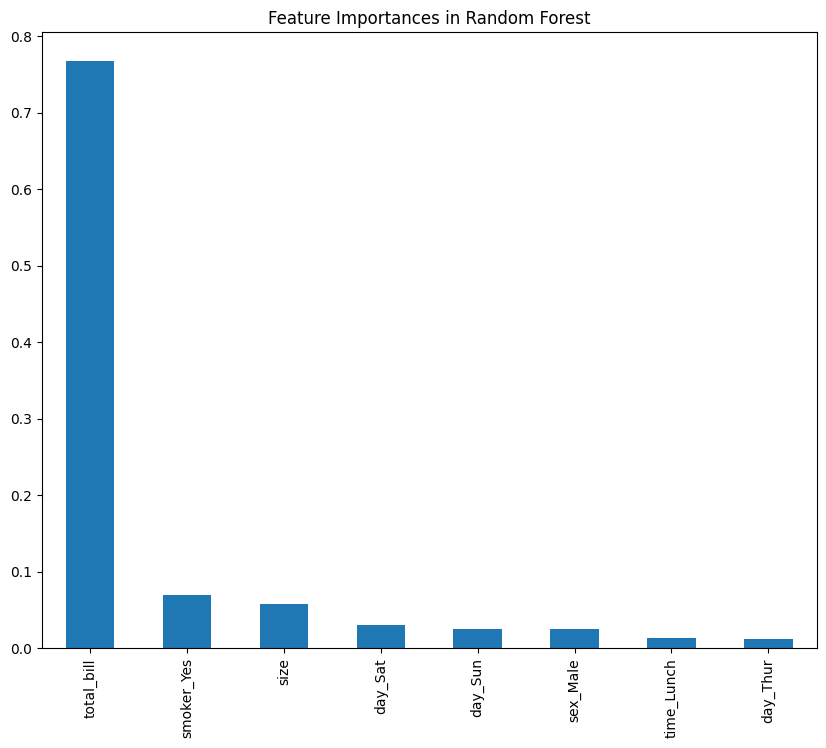

In [79]:
# Feature Importance for Random Forest
feature_importances = pd.Series(forest.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances in Random Forest')
plt.show()


In [80]:
# Pearson Correlation
correlation = df.corr()
print(correlation['tip'].sort_values(ascending=False))
spearman_corr = df.corr(method='spearman')
print(spearman_corr['tip'].sort_values(ascending=False))

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_train)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

print("PCA Components:", pca.components_)

tip           1.000000
total_bill    0.675734
size          0.489299
day_Sun       0.125114
sex_Male      0.088862
smoker_Yes    0.005929
day_Sat      -0.002790
day_Thur     -0.095879
time_Lunch   -0.121629
Name: tip, dtype: float64
tip           1.000000
total_bill    0.678968
size          0.468268
day_Sun       0.181639
sex_Male      0.055982
smoker_Yes    0.016984
day_Sat      -0.051723
day_Thur     -0.112340
time_Lunch   -0.140286
Name: tip, dtype: float64
Explained Variance Ratio: [0.31600581 0.21131162]
PCA Components: [[-0.3076671  -0.23128117 -0.20846707 -0.08272939 -0.27367434 -0.26968726
   0.56327277  0.58020878]
 [-0.20919883 -0.3836954  -0.08931474  0.33366097  0.59769233 -0.55315488
  -0.13145765 -0.09596544]]


In [81]:
feature_names = ['total_bill', 'size', 'sex_male', 'smoker_yes', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Lunch']
lasso_coefficients = pd.Series(lasso.coef_, index=feature_names)
significant_features_lasso = lasso_coefficients[lasso_coefficients != 0].sort_values(ascending=False)

print("\nSignificant Features from Lasso Regression:\n", significant_features_lasso)


Significant Features from Lasso Regression:
 total_bill    0.816099
size          0.215637
sex_male      0.003912
day_Thur     -0.008759
day_Sat      -0.058889
smoker_yes   -0.075275
dtype: float64


Summary of Factors Impacting Tip Amounts:
Total Bill: Strong positive correlation (0.68) with tip amounts. The higher the total bill, the higher the tip.

Group Size: Moderate positive correlation (0.47) with tips. Larger groups tend to leave higher tips.

Day of the Week:

Sunday: Positive correlation (0.18) with tips.
Saturday: Very low negative correlation (-0.05) with tips.
Time of Day (Lunch): Slight negative correlation (-0.12) with tips. Tips are generally lower during lunch.

Other Factors:

Gender (Male) and Smoker (Yes) have minimal impact on tip amounts.
Day (Thursday) shows a slight negative correlation, but it's not significant.

Build and evaluate models to forecast tips effectively  -  Hyper Parameter Tuning.

In [82]:
# Ridge Regression
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

print("Best parameters for Ridge:", ridge_grid.best_params_)
print("Best CV score for Ridge:", -ridge_grid.best_score_)

# Lasso Regression
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

print("Best parameters for Lasso:", lasso_grid.best_params_)
print("Best CV score for Lasso:", -lasso_grid.best_score_)

Best parameters for Ridge: {'alpha': 10}
Best CV score for Ridge: 1.2476198439374941
Best parameters for Lasso: {'alpha': 0.1}
Best CV score for Lasso: 1.232378874465415


In [83]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)

print("Best parameters for Random Forest:", rf_grid.best_params_)
print("Best CV score for Random Forest:", -rf_grid.best_score_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best CV score for Random Forest: 1.1546519652934912


In [84]:
from sklearn.svm import SVR

svr_params = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],  # Only used for 'rbf' and 'poly' kernels
    'degree': [2, 3, 4]          # Only used for 'poly' kernel
}

svr = SVR()
svr_grid = GridSearchCV(svr, svr_params, cv=5, scoring='neg_mean_squared_error')
svr_grid.fit(X_train, y_train)

print("Best parameters for SVR:", svr_grid.best_params_)
print("Best CV score for SVR:", -svr_grid.best_score_)


Best parameters for SVR: {'C': 1, 'degree': 2, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
Best CV score for SVR: 1.2318734344393873


In [85]:
from sklearn.neighbors import KNeighborsRegressor

knn_params = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

knn = KNeighborsRegressor()
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)

print("Best parameters for KNN:", knn_grid.best_params_)
print("Best CV score for KNN:", -knn_grid.best_score_)


Best parameters for KNN: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Best CV score for KNN: 1.337480026683447


In [86]:
from sklearn.tree import DecisionTreeRegressor

dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeRegressor(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, y_train)

print("Best parameters for Decision Tree:", dt_grid.best_params_)
print("Best CV score for Decision Tree:", -dt_grid.best_score_)


Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best CV score for Decision Tree: 1.5554503648107771


In [87]:
lr=Lasso(0.1)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(mean_absolute_error(y_test, y_pred_lr))
print(mean_squared_error(y_test, y_pred_lr))
print(np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print(r2_score(y_test, y_pred_lr))

0.6548093918158158
0.6122093872788174
0.7824381044394613
0.5102212625960604


We found the lasso is the best model even after doing hyper parameter tuning.

QUES : Insights for Management: Provide actionable insights to improve customer
service strategies and revenue management.

Key Findings from the Data:
Total Bill: The amount spent on the bill is the most important factor in determining the tip. Higher bills lead to higher tips.

Action: Encourage customers to order more (upselling) or focus on premium items to increase the total bill and consequently, tips.
Group Size: Larger groups tend to leave bigger tips.

Action: Provide better service to large groups and consider group-specific offers or promotions to increase the size of bills and tips.
Day of the Week:

Sunday: Has a positive effect on tips.
Action: Run special promotions or events on Sundays to attract more customers and increase tips.
Saturday: Slightly negative correlation.
Action: Focus on improving service or offering discounts on Saturdays to boost tips.
Time of Day (Lunch): Tips during lunch are generally lower than dinner.

Action: Introduce quick, premium-priced lunch offerings to boost the total bill and tip amount.
Gender and Smoking Status: These have minimal impact on tips.

Action: Focus less on these factors and instead prioritize service quality and customer satisfaction overall.
Principal Component Analysis (PCA) Insights:
Main Drivers of Tips: The two key factors driving tips are Total Bill and Group Size.
Action: Focus efforts on increasing the total bill and improving service for larger groups to maximize tips.
Practical Strategies:
Upsell More: Encourage customers to order more expensive items, especially during dinner or for larger groups.
Promote Sundays: Run events or specials to attract more customers and increase tips on Sundays.
Improve Lunchtime Service: Since lunch tips are lower, consider introducing offers to make lunch more appealing and increase the tip amount.
Focus on Larger Groups: Larger groups leave higher tips, so ensure they receive excellent service and offer group discounts or packages.

Plotting


In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


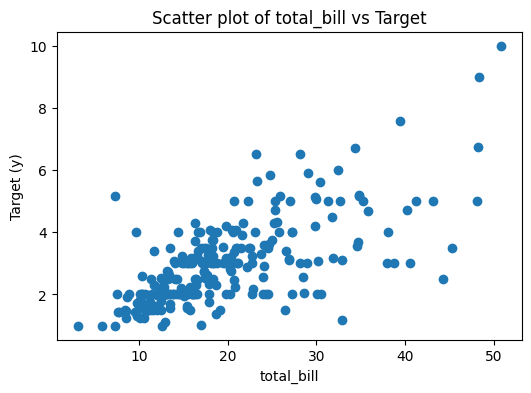

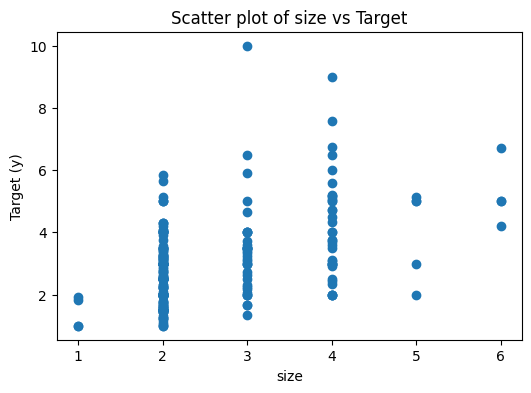

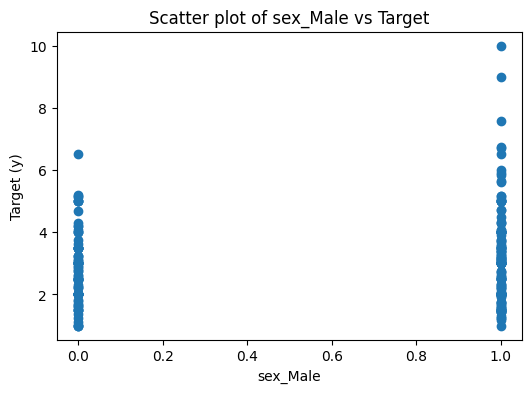

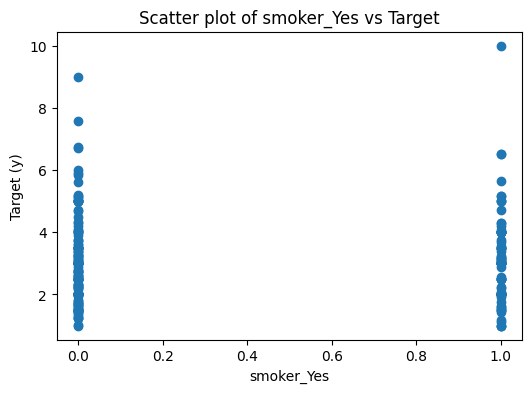

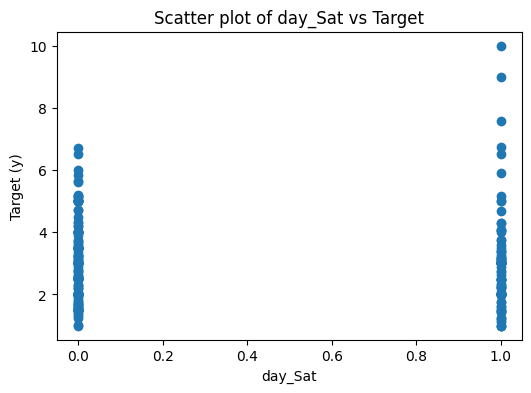

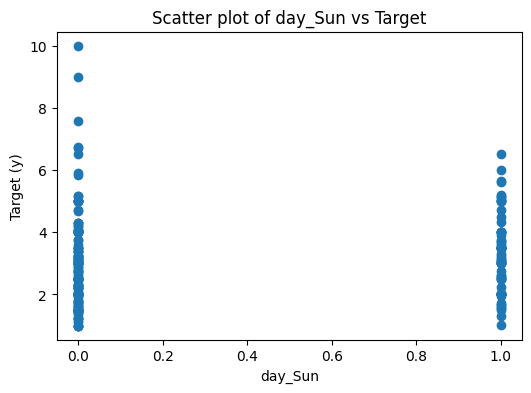

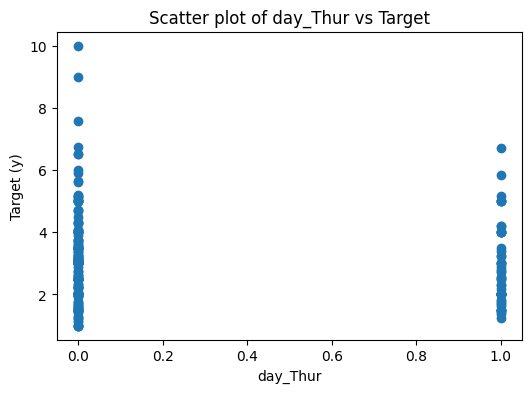

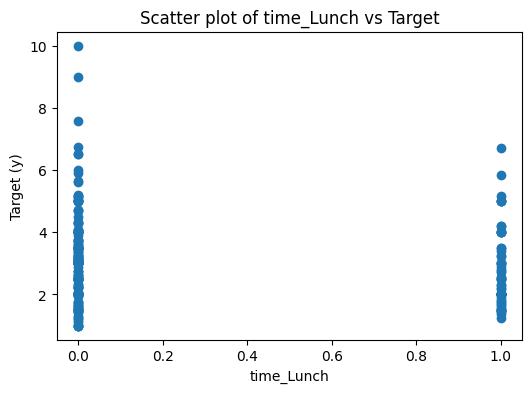

In [89]:
# Assuming your target variable is 'y' and predictors are in a DataFrame X
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(X[column], y)
    plt.xlabel(column)
    plt.ylabel('Target (y)')
    plt.title(f'Scatter plot of {column} vs Target')
    plt.show()


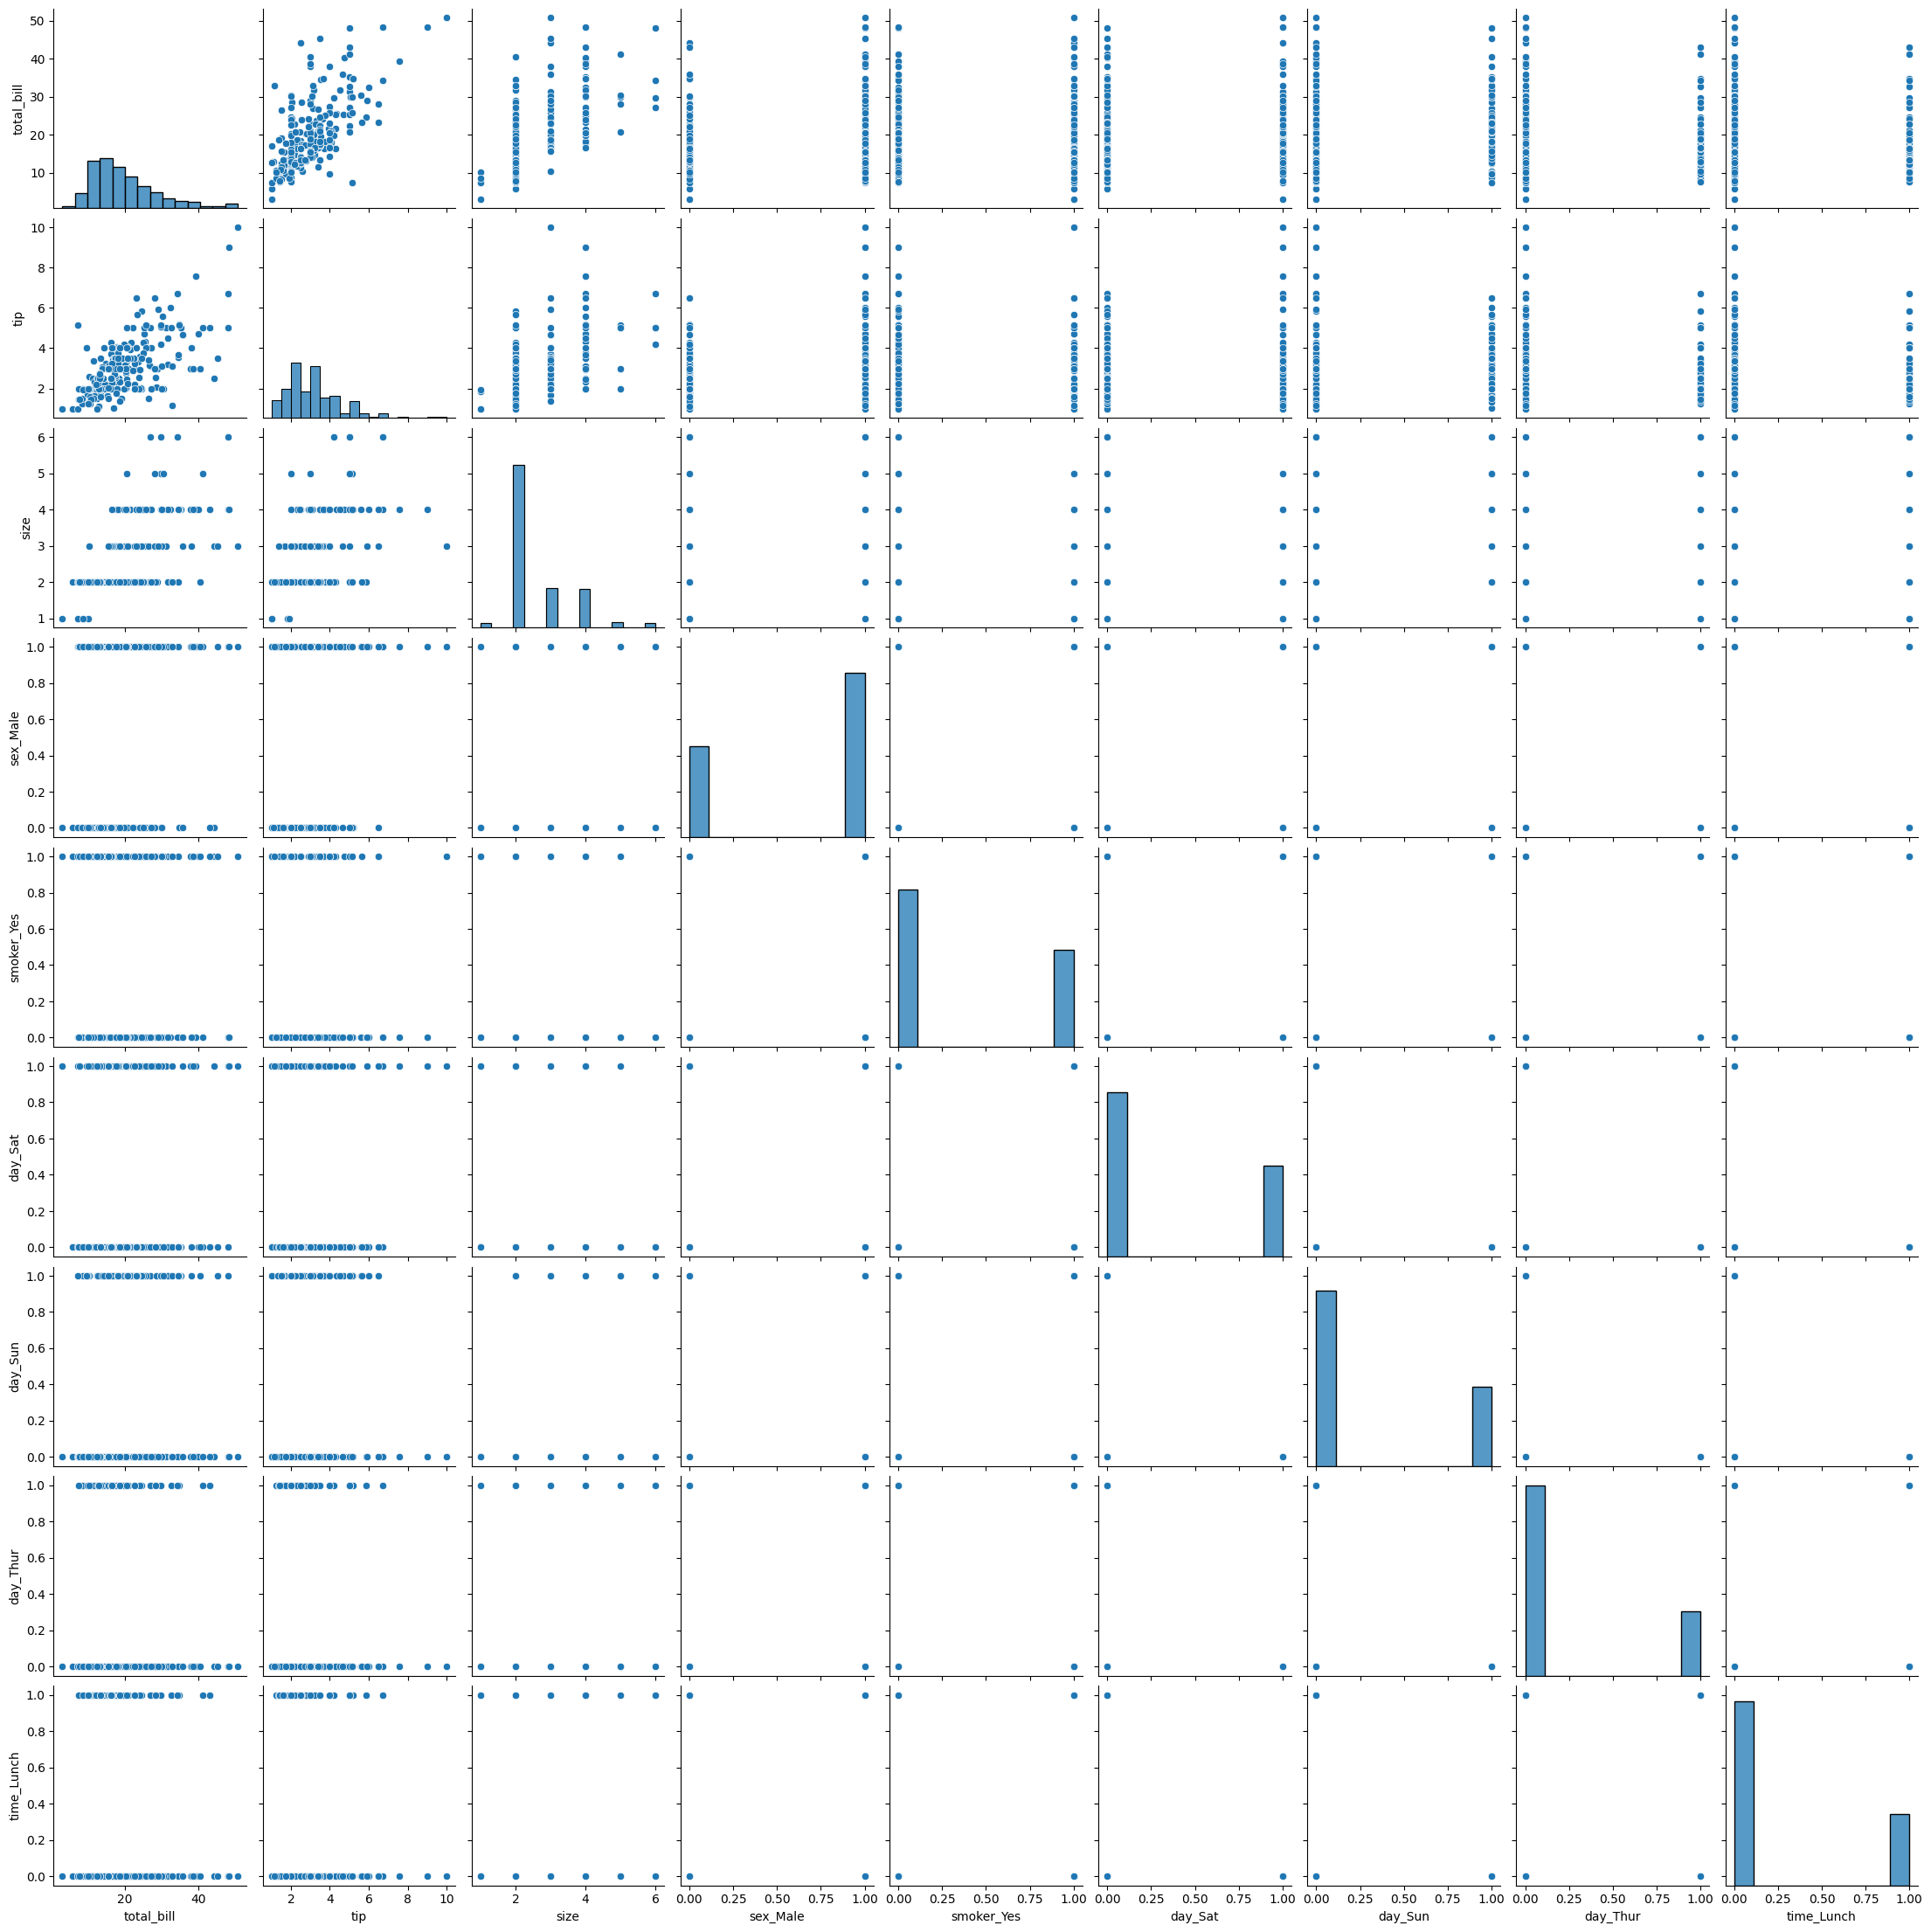

In [90]:
# Assuming your data is in a DataFrame called 'data' with the target variable labeled as 'y'
sns.pairplot(df)
plt.show()


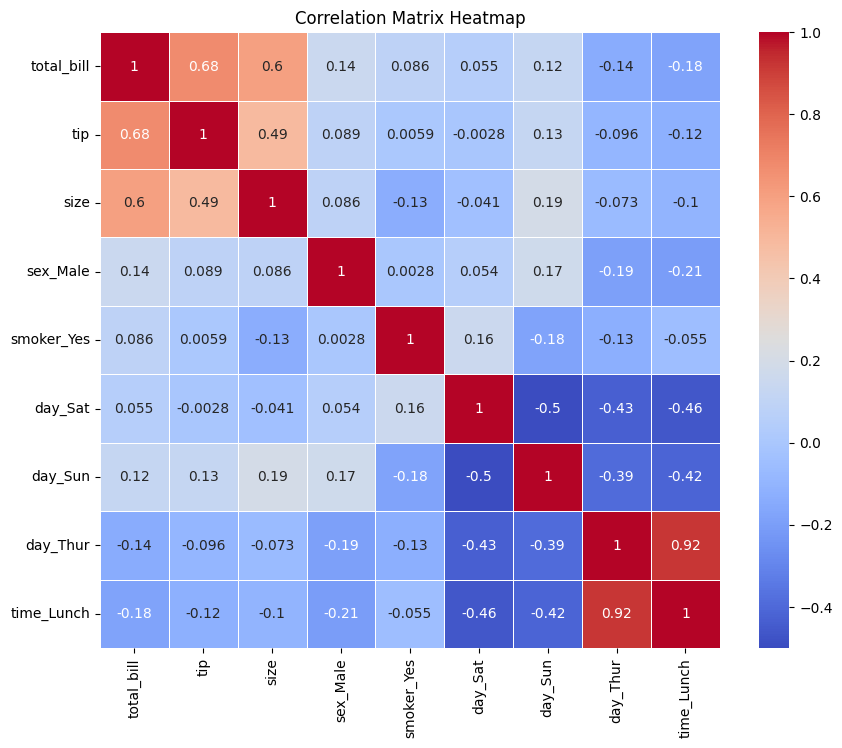

In [91]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [92]:
X = X.apply(pd.to_numeric, errors='coerce')  # Convert columns to numeric, replace non-numeric with NaN
y = pd.to_numeric(y, errors='coerce')  # Convert y to numeric, replace non-numeric with NaN

X = X.fillna(X.mean())  # Replace NaN with the mean of each column
y = y.fillna(y.mean())  # Replace NaN with the mean of y

X = X.astype(float)  # Ensure all columns are of type float
y = y.astype(float)  # Ensure y is of type float

X_with_constant = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X_with_constant).fit()

rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print(f'Rainbow test statistic: {rainbow_statistic}')
print(f'Rainbow test p-value: {rainbow_p_value}')

if rainbow_p_value > 0.05:
    print("Data likely follows a linear trend (p > 0.05).")
else:
    print("Data likely does not follow a linear trend (p <= 0.05).")


Rainbow test statistic: 1.197054547994589
Rainbow test p-value: 0.1658838305924099
Data likely follows a linear trend (p > 0.05).


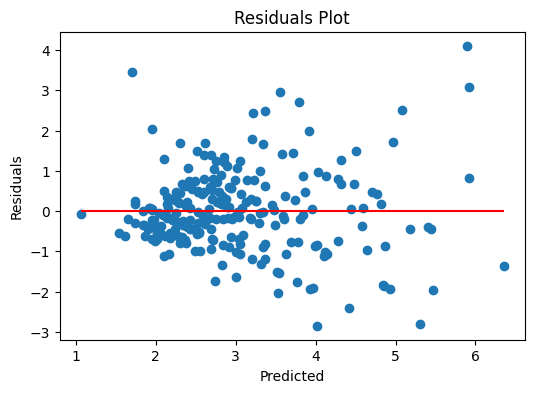

In [93]:
# Fit model and get predictions
y_pred = model.predict(X_with_constant)
residuals = y - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals)
plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), colors='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


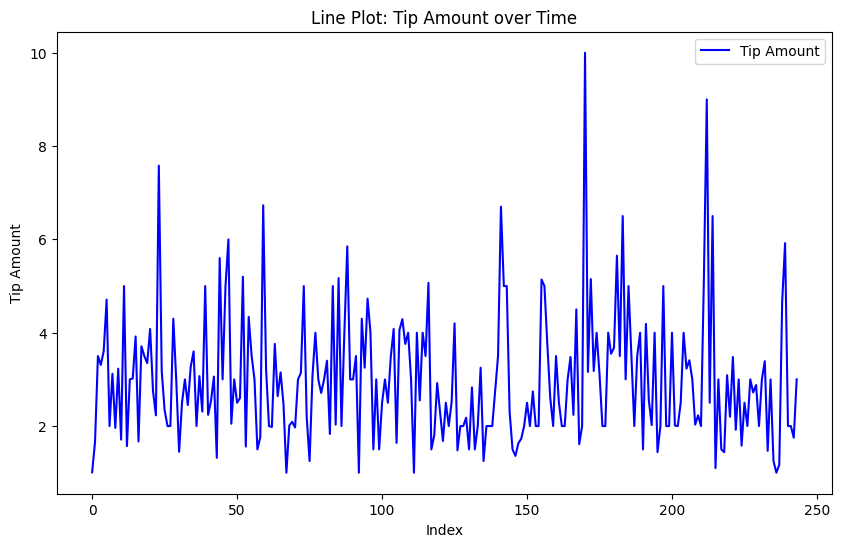

In [94]:

df['index'] = df.index

plt.figure(figsize=(10, 6))
plt.plot(df['index'], df['tip'], label='Tip Amount', color='blue')
plt.title('Line Plot: Tip Amount over Time')
plt.xlabel('Index')
plt.ylabel('Tip Amount')
plt.legend()
plt.show()



Lasso Regression is the best model in this case based on the combination of evaluation metrics. It has the lowest MAE, MSE, RMSE, and the highest R-squared value among the models tested. Although the R-squared value is not extremely high (which suggests room for improvement), Lasso Regression performs the best in terms of prediction accuracy and generalization.

QUES: Based on the trend in data apply suitable regression method and check
model prediction accuracy.

In [95]:
lr=Lasso(0.1)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(mean_absolute_error(y_test, y_pred_lr))
print(mean_squared_error(y_test, y_pred_lr))
print(np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print(r2_score(y_test, y_pred_lr))

0.6548093918158158
0.6122093872788174
0.7824381044394613
0.5102212625960604
